In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn as sk


In [2]:
#import and clean data 
dataset = pd.read_csv(r'Downloads/Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
dataset_cleaned = dataset.dropna()
dataset_cleaned.drop_duplicates()
dataset_cleaned.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [5]:
dataset_cleaned.drop(['Id'], axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


array([[<AxesSubplot:xlabel='Id', ylabel='Id'>,
        <AxesSubplot:xlabel='SepalLengthCm', ylabel='Id'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='Id'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='Id'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='Id'>],
       [<AxesSubplot:xlabel='Id', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='Id', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='Id', ylabel='Peta

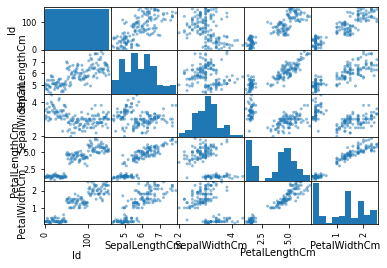

In [21]:
# visualzation data 
plot = pd.plotting.scatter_matrix(dataset_cleaned)
plot

In [7]:
# SKLearn method needed 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [26]:
array = dataset_cleaned.values
# in this case we are deviding the dataset to the part that we need to be the output(y) and the input(x) 
x = array[:,0:5]
y = array[:,5]
# random_stat used to train and test the same data (i think)
xtrain , xtest , y_train , ytest = train_test_split(x, y,test_size=0.20 , random_state=1)

In [20]:
models =[]
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    # Test options and evaluation metric
	kfold = StratifiedKFold(n_splits=10, random_state=1,shuffle= True) #choosing the number of folds that we need to devide to
	cv_results = cross_val_score(model, xtrain, y_train, cv=kfold, scoring='accuracy') #train and test the accuracy with each model
	results.append(cv_results) #append the amount of the error
	names.append(name) 
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.933333 (0.062361)
LDA: 0.991667 (0.025000)
KNN: 1.000000 (0.000000)
CART: 0.991667 (0.025000)
NB: 0.991667 (0.025000)
SVM: 1.000000 (0.000000)


In [27]:
model =SVC(gamma='auto')
model.fit(xtrain , y_train)
prediction = model.predict(xtest)
#results of comparison
print(accuracy_score(ytest , prediction))
print(confusion_matrix(ytest , prediction))
print(classification_report(ytest , prediction))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# now we can just modify the code 